<a href="https://colab.research.google.com/github/Phudit-2547/Data_Engineer_Raven/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Data_Engineer_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Note before start the session


*   Using Chrome
*   Upload file to computer



#What is ETL

###ETL ย่อมาจาก Extract-Transform-Load 
>กระบวนการหนึ่งในระบบ Data Warehouse (แหล่งรวมข้อมููลในบริษัท)โดยระบบที่ออกแบบเอาไว้จะดึงข้อมูลออกมาจากหลายๆแหล่ง, มีกระบวนการตรวจคุณภาพของข้อมูลมาประยุกต์ใช้, มีการเชื่อมโยงและปรับข้อมูลให้เป็นไปในรูปแบบเดียวกันเพื่อให้ ข้อมูลจากหลายๆ แหล่งสามารถใช้งานร่วมกันได้ และท้ายที่สุดทำการส่งมอบ (Delivery)
*   Extract - กระบวนการรวบรวมข้อมูลที่แยกจากกันซึ่งอาจจะมาจากหลายแหล่งที่มา
*   Transform - นำมาปรับแต่งให้หน้าตามันเหมือนกัน หรือ ในรูปแบบ (Format) ให้เหมือนกัน 
*   Load - เอาไปเก็บไว้ในสถานที่ที่เตรียมไว้ เช่น Cloud, Database



##Beneficial of ETL Process

*   การรวบรวมข้อมููลที่มีอยู่หลากแหล่งที่มา (Source) ให้สามารถเข้างานผ่านฐานข้อมูลเดียว รวมไปถึงข้อมูลที่อยู่ระบบเก่า
*   เป็นข้อมููลที่ผ่านการTransformเพื่อที่ทีมอื่นๆ สามารถนำไปใช้ได้สะดวกมากยิ่งขึ้น 



##Extract 


> เป็นกระบวนการเริ่มต้นของระบบดึงข้อมูลจากแหล่งของข้อมูล โดยทั่วไปแล้วระบบ Data warehouse จะประกอบด้วยข้อมูลจากหลายๆ ที่
*   Flat File - ระบบไฟล์ข้อมูลธรรมดา
*   RDBMS (Relational Database System) - Information Management System (IMS) หรือ Screen scraping
![picture]

###Extract text file 

In [ ]:
from google.colab import files
uploaded = files.upload() ##run for upload file - ./Netflix/titles.csv

Saving titles.csv to titles.csv


In [ ]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['titles.csv']))
print(df.head())

         id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm127384      Monty Python and the Holy Grail  MOVIE   
3   tm70993                        Life of Brian  MOVIE   
4  tm190788                         The Exorcist  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  King Arthur, accompanied by his squire, recrui...          1975   
3  Brian Cohen is an average young Jewish man, bu...          1979   
4  12-year-old Regan MacNeil begins to adapt an e...          1973   

  age_certification  runtime                 genres production_countries  \
0             TV-MA       48      ['documentation']               ['US']   
1                 R      113     ['crime', 'drama']               ['US']

In [ ]:
#import data from your computer
#Extract file credits.csv
from google.colab import files
uploaded = files.upload() ##run for upload file - ./Netflix/credits.csv

Saving credits.csv to credits.csv


In [ ]:
###=========Start Here=========###


###Extract from JSON

In [ ]:
#Upload file - ./Public train/train.json
import json
from google.colab import files
uploaded = files.upload() 

Saving train.json to train.json


In [ ]:
file_name = "train.json"
uploaded[file_name].decode("utf-8")

'[\r\n    {\r\n        "stationId": "A1",\r\n        "name": "สุวรรณภูมิ",\r\n        "nameEng": "Suvamabhumi",\r\n        "geoLat": "13.698430460292863",\r\n        "geoLng": "100.75222224366766",\r\n        "lineName": "แอร์พอร์ต เรล ลิงก์",\r\n        "lineNameEng": "Airport Rail Link",\r\n        "lineColorHex": "#0332F8",\r\n        "lineServiceName": "AIRPORTLINK"\r\n    },\r\n    {\r\n        "stationId": "A2",\r\n        "name": "บ้านทับช้าง",\r\n        "nameEng": "Ban Thap Chang",\r\n        "geoLat": "13.732814119012762",\r\n        "geoLng": "100.69131829068533",\r\n        "lineName": "แอร์พอร์ต เรล ลิงก์",\r\n        "lineNameEng": "Airport Rail Link",\r\n        "lineColorHex": "#0332F8",\r\n        "lineServiceName": "AIRPORTLINK"\r\n    },\r\n    {\r\n        "stationId": "A3",\r\n        "name": "รามคำแหง",\r\n        "nameEng": "Ramkhamhaeng",\r\n        "geoLat": "13.743032742356274",\r\n        "geoLng": "100.60015057327637",\r\n        "lineName": "แอร์พอร์ต เรล ล

In [ ]:
uploaded[file_name].decode("utf-8").split("\r\n")

['[',
 '    {',
 '        "stationId": "A1",',
 '        "name": "สุวรรณภูมิ",',
 '        "nameEng": "Suvamabhumi",',
 '        "geoLat": "13.698430460292863",',
 '        "geoLng": "100.75222224366766",',
 '        "lineName": "แอร์พอร์ต เรล ลิงก์",',
 '        "lineNameEng": "Airport Rail Link",',
 '        "lineColorHex": "#0332F8",',
 '        "lineServiceName": "AIRPORTLINK"',
 '    },',
 '    {',
 '        "stationId": "A2",',
 '        "name": "บ้านทับช้าง",',
 '        "nameEng": "Ban Thap Chang",',
 '        "geoLat": "13.732814119012762",',
 '        "geoLng": "100.69131829068533",',
 '        "lineName": "แอร์พอร์ต เรล ลิงก์",',
 '        "lineNameEng": "Airport Rail Link",',
 '        "lineColorHex": "#0332F8",',
 '        "lineServiceName": "AIRPORTLINK"',
 '    },',
 '    {',
 '        "stationId": "A3",',
 '        "name": "รามคำแหง",',
 '        "nameEng": "Ramkhamhaeng",',
 '        "geoLat": "13.743032742356274",',
 '        "geoLng": "100.60015057327637",',
 '      

In [ ]:
import pandas as pd
import io
df = pd.read_json(io.StringIO(uploaded.get('train.json').decode('utf-8')))
print(df)

    stationId              name                    nameEng     geoLat  \
0          A1        สุวรรณภูมิ                Suvamabhumi  13.698430   
1          A2       บ้านทับช้าง             Ban Thap Chang  13.732814   
2          A3          รามคำแหง               Ramkhamhaeng  13.743033   
3          A4          มักกะสัน                   Makkasan  13.751188   
4          A5          ราชปรารภ               Ratchaprarop  13.755199   
..        ...               ...                        ...        ...   
118      PP12  กระทรวงสาธารณสุข  Ministry of Public Health  13.848715   
119      PP13       แยกติวานนท์               Yaek Tiwanon  13.839570   
120      PP14         วงศ์สว่าง                Wong Sawang  13.830365   
121      PP15           บางซ่อน                   Bang Son  13.820670   
122      PP16            เตาปูน                   Tao Poon  13.806491   

         geoLng             lineName        lineNameEng lineColorHex  \
0    100.752222  แอร์พอร์ต เรล ลิงก์  Airport Rail 

###Extract Data on the Web

In [ ]:
###=========Dowload data using url=========###
#Source - https://github.com/owid/covid-19-data/tree/master/public/data
import pandas as pd
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df1 = pd.read_csv(url)

print(df1)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
201270      ZWE    Africa     Zimbabwe  2022-07-10     255939.0       15.0   
201271      ZWE    Africa     Zimbabwe  2022-07-11     255953.0       14.0   
201272      ZWE    Africa     Zimbabwe  2022-07-12     255981.0       28.0   
201273      ZWE    Africa     Zimbabwe  2022-07-13     255981.0        0.0   
201274      ZWE    Africa     Zimbabwe  2022-07-14     256047.0       66.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

###Extract APIs

In [ ]:
import requests

# Fetch the Hackernews post
resp = requests.get("https://hacker-news.firebaseio.com/v0/item/16222426.json")

# Print the response parsed as JSON
print(resp.json())



{'by': 'neis', 'descendants': 0, 'id': 16222426, 'score': 17, 'time': 1516800333, 'title': 'Duolingo-Style Learning for Data Science: DataCamp for Mobile', 'type': 'story', 'url': 'https://medium.com/datacamp/duolingo-style-learning-for-data-science-datacamp-for-mobile-3861d1bc02df'}


In [ ]:
# Assign the score of the test to post_score
post_score = resp.json()["score"]
print(post_score)

17


In [ ]:
#Show value of Title - the Hackernews post
###=========START HERE=========###
post_title = resp.json()["title"]
print(post_title)

Duolingo-Style Learning for Data Science: DataCamp for Mobile


##Transfrom
การปรับแต่งให้ข้อมูลมีรูปแบบโครงสร้างที่เหมือนกัน หรือ ในอยู่รูปแบบ (Format) เดียวกัน รวมไปถึงการแปลงข้อมูลเพื่อให้ได้ตรง Business requirement 

Upload data tmbd 5000 movie data 
<br>https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?resource=download

In [ ]:
from google.colab import files
uploaded = files.upload() ##run for upload file - ./tmbd/tmdb_5000_movies.csv

Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [ ]:
import pandas as pd
import io
 
movie = pd.read_csv(io.BytesIO(uploaded['tmdb_5000_movies.csv']))
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
#list column name 
list(movie.columns)

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count']

In [ ]:
#count line of data 
len(movie)

4803

In [ ]:
#generate the statistic
movie.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


###Selection 
การเลือก Column ที่ต้องการจะ Load 


####using index

In [ ]:
#using index 
movie.iloc[0:10, 0:5] #[row,col]

,budget,genres,homepage,id,keywords
4257,1500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",http://www.hashtaghorror.com/,301325,[]
3339,7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam..."
3556,15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23..."
2903,1200000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,345003,"[{""id"": 1568, ""name"": ""undercover""}, {""id"": 49..."
2739,16000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,4951,"[{""id"": 497, ""name"": ""shakespeare""}, {""id"": 59..."
393,85000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",NaN,10481,"[{""id"": 212, ""name"": ""london england""}, {""id"":..."
3293,8000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,13197,"[{""id"": 1568, ""name"": ""undercover""}, {""id"": 10..."
3504,6000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,9282,"[{""id"": 567, ""name"": ""alcohol""}, {""id"": 572, ""..."
4602,350000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,389,"[{""id"": 934, ""name"": ""judge""}, {""id"": 1417, ""n..."
2207,20000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.12rounds-movie.com/,17134,"[{""id"": 6149, ""name"": ""police""}, {""id"": 8233, ..."


In [ ]:
#using index - select tail/footer data 
###=========START HERE=========###
movie.tail

<bound method NDFrame.tail of          budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   1999

####using column name 

In [ ]:
movie[["original_title","overview","production_companies","production_countries"]].head()

,original_title,overview,production_companies,production_countries
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."


In [ ]:
#select column 	[title,tagline,vote_average,vote_count]
###=========START HERE=========###
movie[["title","tagline","vote_average","vote_count"]].head()

,title,tagline,vote_average,vote_count
0,Avatar,Enter the World of Pandora.,7.2,11800
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",6.9,4500
2,Spectre,A Plan No One Escapes,6.3,4466
3,The Dark Knight Rises,The Legend Ends,7.6,9106
4,John Carter,"Lost in our world, found in another.",6.1,2124


###Translation
การแปลงข้อมูล เช่นในฐานข้อมููลเดิมเก็บไว้ในรูปแบบ 1 = Male, 2 = Female 

In [ ]:
#netflix data
movie[["vote_average"]].head(10)

,vote_average
0,7.2
1,6.9
2,6.3
3,7.6
4,6.1
5,5.9
6,7.4
7,7.3
8,7.4
9,5.7


In [ ]:
import numpy as np

# create a list of our conditions
conditions = [
    (movie["vote_average"] <= 2),
    (movie["vote_average"] > 2) & (movie["vote_average"] <= 5),
    (movie["vote_average"] > 5) & (movie["vote_average"]<= 8),
    (movie["vote_average"] > 8)
    ]

# create a list of the values we want to assign for each condition
values = ['Bad', 'Average', 'Good', 'Very good']

# create a new column and use np.select to assign values to it using our lists as arguments
movie['vote_tier'] = np.select(conditions, values)

In [ ]:
movie[['title','vote_average','vote_tier']]

,title,vote_average,vote_tier
0,Avatar,7.2,Good
1,Pirates of the Caribbean: At World's End,6.9,Good
2,Spectre,6.3,Good
3,The Dark Knight Rises,7.6,Good
4,John Carter,6.1,Good
...,...,...,...
4798,El Mariachi,6.6,Good
4799,Newlyweds,5.9,Good
4800,"Signed, Sealed, Delivered",7.0,Good
4801,Shanghai Calling,5.7,Good


In [ ]:
###========= Translation data from budget	to 4 range name budget_range =========###
###================================ Start Here =================================###
import numpy as np
# create a list of our conditions
conditions = [
    (movie["budget"] <= 1000000),
    (movie["budget"] > 1000000) & (movie["budget"] <=  19000000),
    (movie["budget"] > 19000000) & (movie["budget"]<= 3000000),
    (movie["budget"] > 35000000)
    ]

# create a list of the values we want to assign for each condition
values = ['Very Poor', 'Poor', 'Rich', 'Very Rich']

# create a new column and use np.select to assign values to it using our lists as arguments
movie['budget_range'] = np.select(conditions, values)
movie[['title','budget','budget_range']].head(100)


,title,budget,budget_range
0,Avatar,237000000,Very Rich
1,Pirates of the Caribbean: At World's End,300000000,Very Rich
2,Spectre,245000000,Very Rich
3,The Dark Knight Rises,250000000,Very Rich
4,John Carter,260000000,Very Rich
...,...,...,...
95,Interstellar,165000000,Very Rich
96,Inception,160000000,Very Rich
97,Shin Godzilla,15000000,Poor
98,The Hobbit: An Unexpected Journey,250000000,Very Rich


### Deriving a new calculated value 
กระบวนการคำนวณเพื่อให้ได้ข้อมููลที่ต้องการ

In [ ]:
movie["Total_point"] = movie["vote_average"]* movie["vote_count"]

In [ ]:
movie[["vote_average","vote_count","Total_point"]]

,vote_average,vote_count,Total_point
0,7.2,11800,84960.0
1,6.9,4500,31050.0
2,6.3,4466,28135.8
3,7.6,9106,69205.6
4,6.1,2124,12956.4
...,...,...,...
4798,6.6,238,1570.8
4799,5.9,5,29.5
4800,7.0,6,42.0
4801,5.7,7,39.9


In [ ]:
###========= Transform revenue to  Revenue1K (1K = 1000) =========###
###========================= Start Here ==========================###
movie[["Revenue1K"]] = movie[["revenue"]]/1000
movie[["Revenue1K","revenue"]]

,Revenue1K,revenue
0,2787965.087,2787965087
1,961000.000,961000000
2,880674.609,880674609
3,1084939.099,1084939099
4,284139.100,284139100
...,...,...
4798,2040.920,2040920
4799,0.000,0
4800,0.000,0
4801,0.000,0


###Filtering
การกรองข้อมููลที่ต้องการ Load ใช้งานเท่านั้น

In [ ]:
#filter using movie original language
movie[movie["original_language"] != "en"].head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,vote_tier,budger_range,budget_range,Total_point,Revenue1K
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...",...,Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143,Good,Poor,Poor,929.5,77000.000
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...",...,Released,NaN,Asterix at the Olympic Games,5.0,471,Average,Very Rich,Very Rich,2355.0,132900.000
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...",...,Released,NaN,The Flowers of War,7.1,187,Good,Very Rich,Very Rich,1327.7,95311.434
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...",...,Released,NaN,Evolution,6.4,47,Good,Very Poor,Very Poor,300.8,0.000
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...",...,Released,NaN,Top Cat Begins,5.3,9,Good,Poor,Poor,47.7,0.000


In [ ]:
#filter popularity is over 28 
###=========Start Here=========###
movie[movie["popularity"] > 28].head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,vote_tier,budger_range,budget_range,Total_point,Revenue1K
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Good,Very Rich,Very Rich,84960.0,2787965.087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Good,Very Rich,Very Rich,31050.0,961000.000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,Good,Very Rich,Very Rich,28135.8,880674.609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Good,Very Rich,Very Rich,69205.6,1084939.099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,Good,Very Rich,Very Rich,12956.4,284139.100


###Sorting
กระบวนการเรียงข้อมูลตามที่กำหนด 

In [ ]:
#sort the vote_count column in a descending order (10 > 9 > 8 >....)
movie.sort_values(by=['vote_count'], inplace=True, ascending=False)
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,vote_tier,budger_range,budget_range,Total_point,Revenue1K
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,Your mind is the scene of the crime.,Inception,8.1,13752,Very good,Very Rich,Very Rich,111391.2,825532.764
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,Released,Why So Serious?,The Dark Knight,8.2,12002,Very good,Very Rich,Very Rich,98416.4,1004558.444
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Good,Very Rich,Very Rich,84960.0,2787965.087
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Released,Some assembly required.,The Avengers,7.4,11776,Good,Very Rich,Very Rich,87142.4,1519557.910
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,Good,Very Rich,Very Rich,81363.0,783112.979


In [ ]:
#sort title (A > B > C)
###=========Start Here=========###
movie.sort_values(by=['title'], inplace=True, ascending=True)
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,vote_tier,budger_range,budget_range,Total_point,Revenue1K
4257,1500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",http://www.hashtaghorror.com/,301325,[],de,#Horror,"Inspired by actual events, a group of 12 year ...",2.815228,"[{""name"": ""AST Studios"", ""id"": 75277}, {""name""...",...,Released,Death is trending.,#Horror,3.3,52,Average,Poor,Poor,171.6,0.000
3339,7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,(500) Days of Summer,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...",...,Released,It was almost like falling in love.,(500) Days of Summer,7.2,2904,Good,Poor,Poor,20908.8,60722.734
3556,15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,10 Cloverfield Lane,"After a car accident, Michelle awakens to find...",53.698683,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Released,Monsters come in many forms.,10 Cloverfield Lane,6.8,2468,Good,Poor,Poor,16782.4,108286.421
2903,1200000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,345003,"[{""id"": 1568, ""name"": ""undercover""}, {""id"": 49...",en,10 Days in a Madhouse,"Nellie Bly, a 23 year-old reporter for Joseph ...",0.489271,[],...,Released,NaN,10 Days in a Madhouse,4.3,5,Average,Poor,Poor,21.5,0.000
2739,16000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,4951,"[{""id"": 497, ""name"": ""shakespeare""}, {""id"": 59...",en,10 Things I Hate About You,"Bianca, a tenth grader, has never gone on a da...",54.550275,"[{""name"": ""Mad Chance"", ""id"": 1757}, {""name"": ...",...,Released,How do I loathe thee? Let me count the ways.,10 Things I Hate About You,7.3,1701,Good,Poor,Poor,12417.3,53478.166


###Joining 
กระบวนการเชื่อมโยงข้อมูลกันระหว่าง Table
<br>
<br>
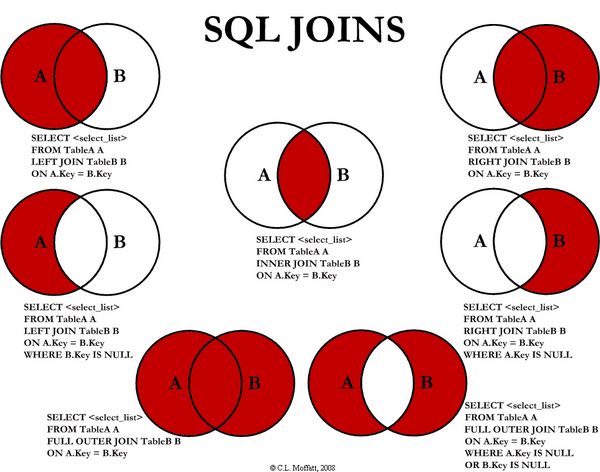

In [ ]:
##upload credit 
from google.colab import files
uploaded = files.upload() ##run for upload file 

Saving tmdb_5000_credits_2.csv to tmdb_5000_credits_2.csv


In [ ]:
credit = pd.read_csv(io.BytesIO(uploaded['tmdb_5000_credits_2.csv']))
credit.head()

,movie_id,title,cast,crew
0,25196,Crazy Heart,"[{""cast_id"": 3, ""character"": ""Bad Blake"", ""cre...","[{""credit_id"": ""56178ad79251412af4002292"", ""de..."
1,16323,The Rose,"[{""cast_id"": 1, ""character"": ""Mary Rose Foster...","[{""credit_id"": ""563a8a369251416d5201436d"", ""de..."
2,175528,Baggage Claim,"[{""cast_id"": 1, ""character"": ""Montana Moore"", ...","[{""credit_id"": ""565c288ac3a3685081006e75"", ""de..."
3,8069,Barbarella,"[{""cast_id"": 2, ""character"": ""Barbarella"", ""cr...","[{""credit_id"": ""52fe4491c3a36847f809d5ab"", ""de..."
4,71805,Shipwrecked,"[{""cast_id"": 1000, ""character"": ""Haakon Haakon...","[{""credit_id"": ""57798e709251415fbe0018d5"", ""de..."


In [ ]:
list(credit.columns)

['movie_id', 'title', 'cast', 'crew']

In [ ]:
new_movie = pd.merge(movie, credit,  how='left', left_on=['id'], right_on = ['movie_id'])
new_movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_count,vote_tier,budger_range,budget_range,Total_point,Revenue1K,movie_id,title_y,cast,crew
0,1500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",http://www.hashtaghorror.com/,301325,[],de,#Horror,"Inspired by actual events, a group of 12 year ...",2.815228,"[{""name"": ""AST Studios"", ""id"": 75277}, {""name""...",...,52,Average,Poor,Poor,171.6,0.000,301325.0,#Horror,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{""credit_id"": ""545bbac70e0a261fb6002329"", ""de..."
1,7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,(500) Days of Summer,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...",...,2904,Good,Poor,Poor,20908.8,60722.734,19913.0,(500) Days of Summer,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{""credit_id"": ""52fe47f99251416c750abaa5"", ""de..."
2,15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,10 Cloverfield Lane,"After a car accident, Michelle awakens to find...",53.698683,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,2468,Good,Poor,Poor,16782.4,108286.421,333371.0,10 Cloverfield Lane,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...","[{""credit_id"": ""57627624c3a3680682000872"", ""de..."
3,1200000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,345003,"[{""id"": 1568, ""name"": ""undercover""}, {""id"": 49...",en,10 Days in a Madhouse,"Nellie Bly, a 23 year-old reporter for Joseph ...",0.489271,[],...,5,Average,Poor,Poor,21.5,0.000,NaN,NaN,NaN,NaN
4,16000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,4951,"[{""id"": 497, ""name"": ""shakespeare""}, {""id"": 59...",en,10 Things I Hate About You,"Bianca, a tenth grader, has never gone on a da...",54.550275,"[{""name"": ""Mad Chance"", ""id"": 1757}, {""name"": ...",...,1701,Good,Poor,Poor,12417.3,53478.166,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,5600000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",http://www.rec2themovie.com/,10664,"[{""id"": 3684, ""name"": ""religion and supernatur...",es,[REC]²,"The action continues from [REC], with the medi...",22.341462,"[{""name"": ""Filmax"", ""id"": 3631}]",...,489,Good,Poor,Poor,3129.6,18469.680,10664.0,[REC]²,"[{""cast_id"": 3, ""character"": ""\u00c1ngela Vida...","[{""credit_id"": ""52fe439e9251416c7501783d"", ""de..."
4799,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",NaN,1946,"[{""id"": 282, ""name"": ""video game""}, {""id"": 215...",en,eXistenZ,A game designer on the run from assassins must...,21.928025,"[{""name"": ""Alliance Atlantis Communications"", ...",...,475,Good,Poor,Poor,3182.5,2856.712,NaN,NaN,NaN,NaN
4800,70000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/xxx/,7451,"[{""id"": 999, ""name"": ""sports car""}, {""id"": 186...",en,xXx,Xander Cage is your standard adrenaline junkie...,46.217769,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,1424,Good,Very Rich,Very Rich,8259.2,277448.382,NaN,NaN,NaN,NaN
4801,60000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/xxxstateoft...,11679,"[{""id"": 521, ""name"": ""washington d.c.""}, {""id""...",en,xXx: State of the Union,"Ice Cube stars as Darius Stone, a thrill-seeki...",36.689223,"[{""name"": ""Original Film"", ""id"": 333}, {""name""...",...,549,Average,Very Rich,Very Rich,2580.3,71073.932,NaN,NaN,NaN,NaN


###Aggregation
กระบวนการรวบรวม และ สรุปชุดข้อมูล 

In [ ]:
movie.aggregate(['sum', 'min'])

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,...,spoken_languages,status,title,vote_average,vote_count,vote_tier,budger_range,budget_range,Total_point,Revenue1K
sum,139503326521,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",274565821,"[][{""id"": 248, ""name"": ""date""}, {""id"": 572, ""n...",deenenenenenenenenenenenenenenenenenenenzhenen...,#Horror(500) Days of Summer10 Cloverfield Lane...,103227.519725,"[{""name"": ""AST Studios"", ""id"": 75277}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",395097847444,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",ReleasedReleasedReleasedReleasedReleasedReleas...,#Horror(500) Days of Summer10 Cloverfield Lane...,29260.7,3315117,AverageGoodGoodAverageGoodGoodGoodGoodVery goo...,PoorPoorPoorPoorPoorVery RichPoorPoorVery Poor...,PoorPoorPoorPoorPoorVery RichPoorPoorVery Poor...,22412983.0,3.950978e+08
min,0,[],5,[],af,#Horror,0.000000,[],[],0,...,[],Post Production,#Horror,0.0,0,Average,0,0,0.0,0.000000e+00


In [ ]:
#aggregate max and mean
###=========Start Here=========###
movie.aggregate(['max', 'mean'])

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,...,spoken_languages,status,title,vote_average,vote_count,vote_tier,budger_range,budget_range,Total_point,Revenue1K
max,3.800000e+08,"[{""id"": 99, ""name"": ""Documentary""}]",459488.000000,"[{""id"": 999, ""name"": ""sports car""}, {""id"": 186...",zh,해운대,875.581305,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""ZA"", ""name"": ""South Africa""}]",2.787965e+09,...,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Rumored,Æon Flux,10.000000,13752.000000,Very good,Very Rich,Very Rich,111391.200000,2.787965e+06
mean,2.904504e+07,NaN,57165.484281,NaN,NaN,NaN,21.492301,NaN,NaN,8.226064e+07,...,NaN,NaN,NaN,6.092172,690.217989,NaN,NaN,NaN,4666.454924,8.226064e+04


###Split column into multiple column
ชื่อ - ณเดชน์ คูกิมิยะ แยกเป็น ชื่อ - ณเดชน์ และ นามสกุล - คูกิมิยะ

In [ ]:
pd.DataFrame(movie["release_date"].str.split('-').fillna('[]').tolist(), columns=['year', 'month','day'])

,year,month,day
0,2015,11,20
1,2009,07,17
2,2016,03,10
3,2015,11,20
4,1999,03,30
...,...,...,...
4798,2009,09,15
4799,1999,04,14
4800,2002,08,09
4801,2005,04,27


##Loading
นำ ข้อมูลเข้าสู่ระบบปลายทางที่ต้องการหรือในนสถานที่ที่เตรียมไว้ เช่น Cloud, Database

*   ความถี่ในการโหลด - Streaming (Real Time), Hr,Day,Week,Month
*   การเก็บข้อมูลอยู่ในรููปแบบไหน - Full, Incremental, Differential<br><br>

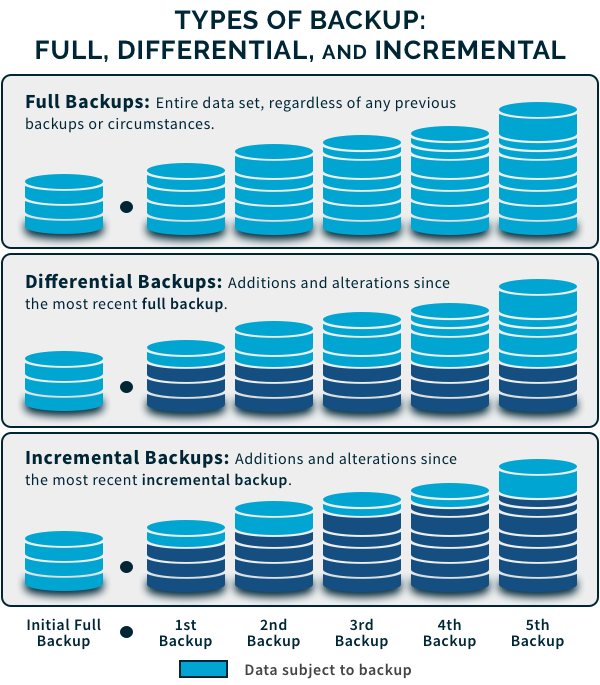

##ตัวอย่างการใช้ E-T-L
สถาบันทางการเงินต้อง การทางการเงินของลูกค้าจากหลายๆแผนกและในแต่ละแผนกอาจจะข้อมูลที่เก็บเอาไว้ ในรูปแบบที่แตกต่างกันออกไป แผนกที่ดูแลลูกค้าอาจจะลูกค้าที่เรียงตามรายชื่อ ซึ่งแผนกบัญชีอาจใช้วิธีค้นหาลูกค้าด้วยหมายเลข ID ระบบ สามารถที่จะรวม ข้อมูลที่แตกต่างกันนี้พร้อมกับเชื่อมโยง ตรวจสอบคุณภาพของข้อมูลและนำเสนอในรูปแบบที่แตกต่างจากที่สองแผนกใช้กันอยู่